# Load, Describe, and Explotaroty Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

In [2]:
#Pandas show all column
pd.set_option('display.max_columns', 200)

#change params for matplotlib
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Data

In [3]:
df_raw = pd.read_csv('hotel_booking.csv')

In [4]:
df=df_raw.copy()

In [5]:
df.shape

(119390, 36)

# Explore data 

Kita memiliki 119.390 data yang akan digunakan yang masing - masing memiliki 36 kolom. Kolom - kolom tersebut memiliki arti :

1. **hotel** : jenis hotel
2. **is_canceled** : customer cancel booking/tidak
3. **lead_time** : rentang hari antara tanggal pesananan booking hingga kedatangan
4. **arrival_date_year** : tahun customer datang
5. **arrival_date_month** : bulan customer datang
6. **arrival_date_week_number** : minggu ke-n customer datang
7. **arrival_date_day_of_month** : tanggal customer datang
8. **stays_in_weekend_nights** : jumlah hari/malam booking di weekend(sabtu atau minggu)
9. **stays_in_week_nights** : jumlah hari/malam booking di weekday (senin-jumat)
10. **adults** : jumlah orang dewasa
11. **children** : jumlah anak-anak
12. **babies** : jumlah bayi
13. **meal** : jenis food services (BB, HB, FB, SC, undefined)
14. **country** : negara asal
15. **market_segment** : Segmentasi market B2B
16. **distribution_channel** : channel customer melakukan booking
17. **is_repeated_guest** : customer merupakan customer yang sebelumnya pernah booking
18. **previous_cancellations** : jumlah cancel booking sebelum booking terakhir
19. **previous_bookings_not_canceled** : jumlah booking tidak cancel sebelum booking terakhir
20. **reserved_room_type** : kode room yang dipesan
21. **assigned_room_type** : kode room yang diberikan saat check-in atau cancel
22. **booking_changes** : jumlah perubahan terhadap booking detail sejak booking hingga check-in atau cancel
23. **deposit_type** : tipe deposit
24. **agent** : ID travel agent yang membuat booking
25. **company** : ID company yang membuat booking
26. **days_in_waiting_list** : jumlah hari booking masuk kategori waiting list sebelum dikonfirmasi
27. **customer_type** : jenis customer
28. **adr** : rata - rata pengeluaran yang dikeluarkan customer perhari
29. **required_car_parking_spaces** : jumlah lot parkir mobil yang diminta customer
30. **total_of_special_requests** : jumlah spesial request dari customer
31. **reservation_status** : status reservasi
32. **reservation_status_date** : tanggal status reservasi terakhir diupdate
33. **name** : nama tamu
34. **email** : email tamu
35. **phone-number** : nomer telepon tamu
36. **credit card** : nomer kartu kredit tamu

# Exploratory Data Analysis

## Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Kita dapat melihat bahwa:
- Dataframe memiliki total 119390 baris dan 36 kolom
- Dataframe masih memiliki beberapa null values di beberapa kolom seperti : `children`, `country`, `agent`, `company`
- Target klasifikasinya akan ada di kolom `is_canceled` dengan tipe data int64
- sisanya adalah feature yang sifatnya adalah numerik dan object dalam bentuk tipe data int64, float64
- kolom `children` seharusnya ber tipe data int64 
- kolom `agent`,`company` seharusnya ber tipe data object 
kita bisa memisahkan tipe numeric dan object :

In [7]:
df['company']=df['company'].astype('object')

Data kolom agent dan company diubah menjadi object untuk memudahkan statistika deskriptif nantinya

In [8]:
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in (['name', 'email', 'phone-number', 'credit_card'])]
nums=[i for i in df.columns if df[i].dtypes != 'object' and i != 'is_canceled']

Penyimpanan kolom diatas memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis

### Sampling untuk memahami data, menghindari invalid values

In [9]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
68517,City Hotel,1,175,2017,May,20,19,0,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,44.0,NaN,0,Transient,90.00,0,0,Canceled,2016-11-25,Matthew Velez,Matthew_Velez@zoho.com,521-956-1799,************1921
2730,Resort Hotel,0,1,2015,October,44,29,0,1,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient,39.00,1,0,Check-Out,2015-10-30,Rose Houston,Rose_Houston@mail.com,844-789-1212,************5568
47385,City Hotel,1,63,2016,February,8,18,2,3,2,0.0,0,BB,UKR,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,9.0,NaN,0,Transient,65.66,0,0,Canceled,2015-12-28,Amanda Benson,Amanda_Benson@yahoo.com,873-596-0623,************4775
41197,City Hotel,1,0,2015,August,33,14,0,2,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient-Party,109.00,0,0,Canceled,2015-08-14,Philip Little,Philip.L90@outlook.com,754-610-0183,************5656
15586,Resort Hotel,1,209,2015,August,31,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,240.0,NaN,0,Transient,120.60,0,1,Canceled,2015-07-27,Charles Sloan,Charles_Sloan@verizon.com,405-450-2388,************3233
44973,City Hotel,0,102,2015,October,42,16,0,2,1,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,6.0,NaN,0,Transient-Party,87.00,0,0,Check-Out,2015-10-18,Cynthia Serrano,Cynthia_S23@xfinity.com,714-726-3465,************8166
9837,Resort Hotel,1,154,2017,January,2,9,2,5,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,37.80,0,0,Canceled,2016-08-08,Brandon Davis,Brandon.D@protonmail.com,142-189-7733,************1045
110801,City Hotel,0,29,2017,April,17,28,2,2,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,NaN,0,Transient,143.50,0,1,Check-Out,2017-05-02,Jonathan Cline,JonathanCline@mail.com,365-655-3375,************4175
47248,City Hotel,1,0,2016,February,7,13,1,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,9.0,NaN,0,Transient-Party,106.00,0,0,No-Show,2016-02-13,Cristian Rodriguez,CRodriguez70@att.com,258-726-2922,************8464
59709,City Hotel,1,166,2016,November,45,1,0,3,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,236.0,NaN,0,Transient,110.00,0,0,Canceled,2016-07-13,Clayton Small,Small_Clayton@yahoo.com,171-892-6228,************3537


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Overall data kita adalah 

In [10]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom hotel:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count kolom arrival_date_month:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Value count kolom meal:
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Value count kolom country:
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
LCA        1
HND        1
PYF        1
BWA        1
BFA        1
Name: country, Length: 177, dtype: int64

Value count kolom market_segment:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, d

Data ini tidak memiliki invalid values, namun terdapat beberapa kolom dengan value 'undefined' seperti pada `meal`, `market_segment`, `distribution_channel`, dan value no-show pada kolom `reservation_status` maka harus ditelusuri lebih lanjut pada tahap berikutnya.

## Statistical summary

Selanjutnya kita munculkan ringkasan statistik dataframe

In [11]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.0,1.0


Dari hasil pengamatan *statistical summary* diatas :
- pada kolom lead time terindikasi positively skewed karena mean > median
- pada kolom adr terdapat invalid value dimana adr adalah nilai rata - rata pengeluaran customer perhari dan seharusnya tidak mungkin negatif
- pada kolom adr juga terindikasi positively skewed

### Pendekatan kategorik

In [12]:
df[cats].describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
company,6797.0,352.0,40.0,927.0


Terdapat missing value pada kolom `agent`, `company`

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Boxplot 

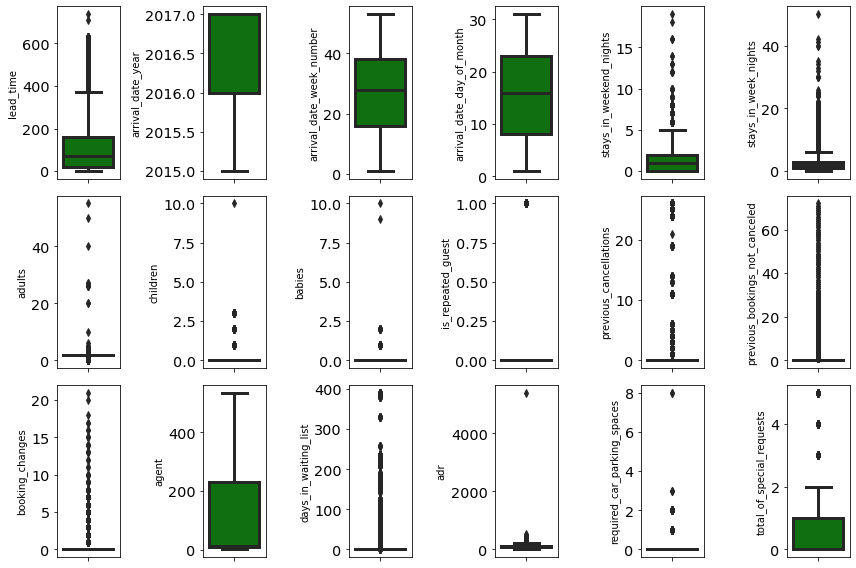

In [14]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Berdasarkan visualisasi diatas :
- Mayoritas feature diatas memiliki outlier kecuali `arrival_date_year`, `arrival_date_week_number` dan `arrival_date_day_of_month`
- Semua data memiliki yang outlier adalah positively skewed

### Histplot

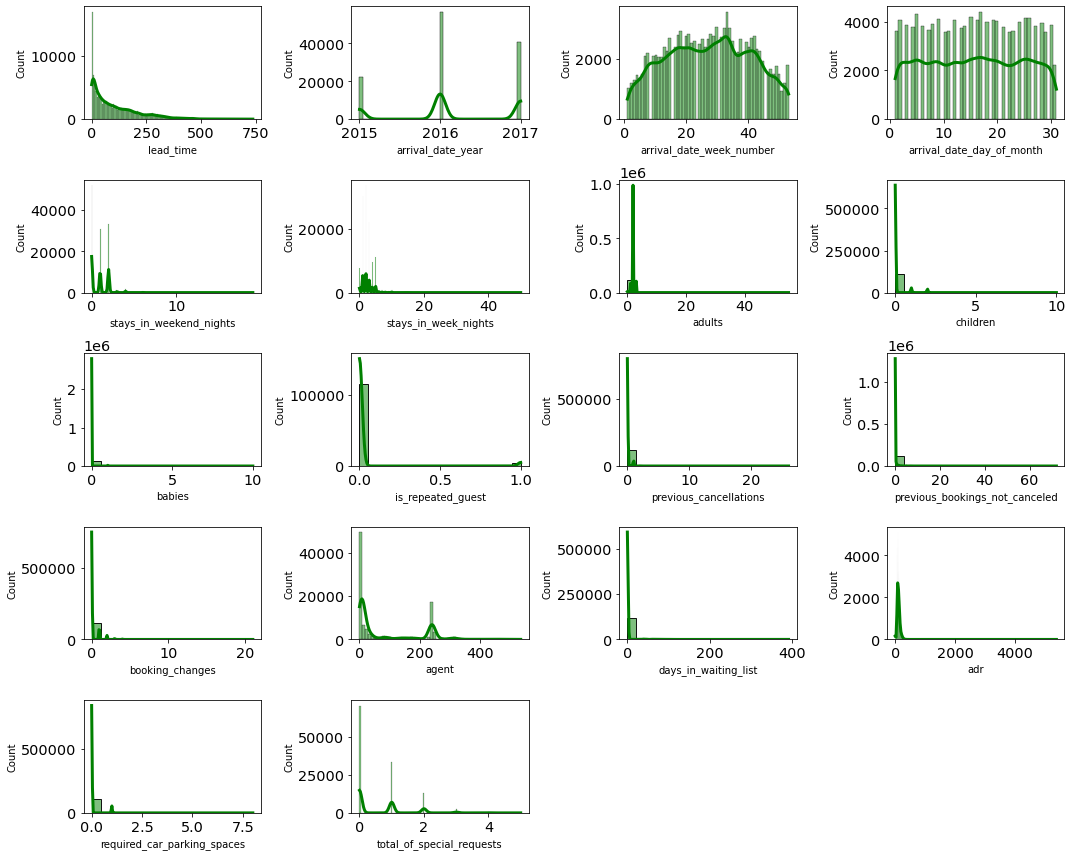

In [15]:
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True)
    plt.tight_layout()

Dari visualisasi diatas :
- Benar adanya bahwa sebagian besar kolom memiliki distribusi yang positively skewed

### Countplot (categorical)

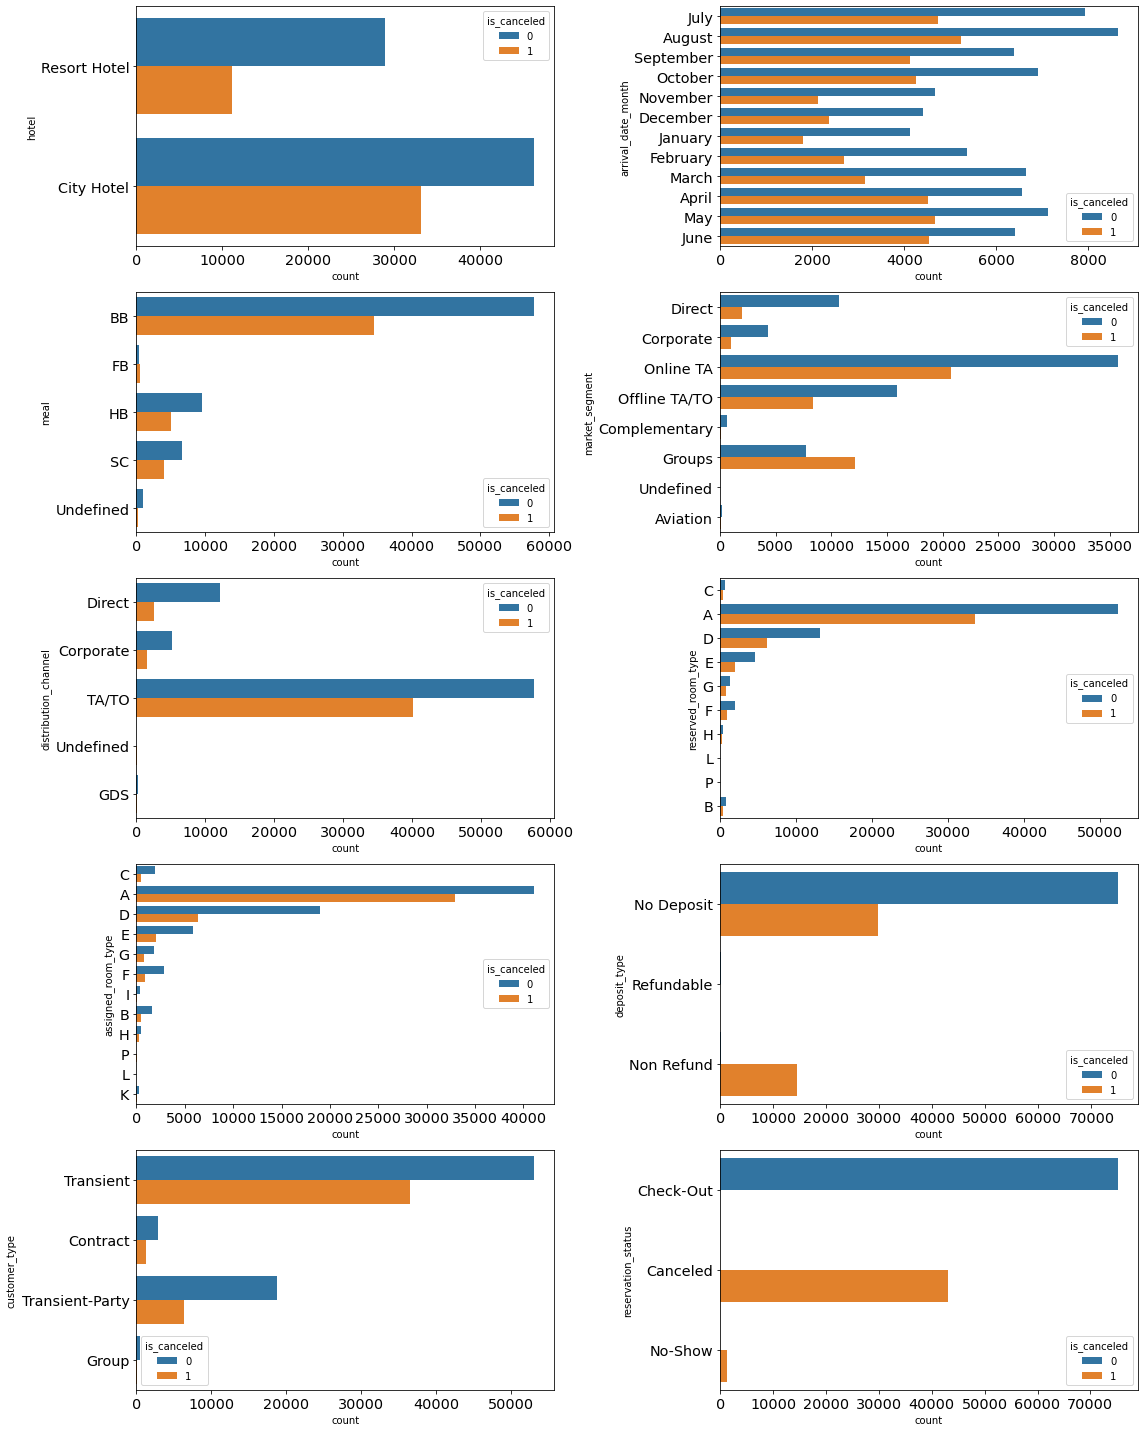

In [16]:
list_cats = [i for i in cats if i not in (['country', 'agent', 'company', 'reservation_status_date'])]
plt.figure(figsize=(16, 20))
for i in range(0, len(list_cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(y = df[list_cats[i]], orient='v', hue=df['is_canceled'])
    plt.tight_layout()

Dari visualisasi diatas terlihat bahwa :
- booking hotel tertinggi ada pada bulan agustus
- booking hotel tertinggi terjadi pada city hotel
- kategori meal paling banyak adalah Bed and Breakfast (sangat timpal)
- Market hotel lebih banyak berasal dari OTA
- Reserved dan Assigned room type terbanyak pada room type A, tidak ada reserved untuk room type I dan K yang artinya 2 tipe room ini tidak diminati pelanggan
- Mayoritas customer tidak melakukan deposit
- Mayoritas customer hotel merupakan cutomer Transient (short-term stays)
- Setelah ditelusuri ternyata semua reservation_status 'No-Show' adalah customer yang cancel booking. Maka dari itu, data pada kolom reservation_status dan is_canceled terbilang redundan 

<AxesSubplot:xlabel='company', ylabel='email'>

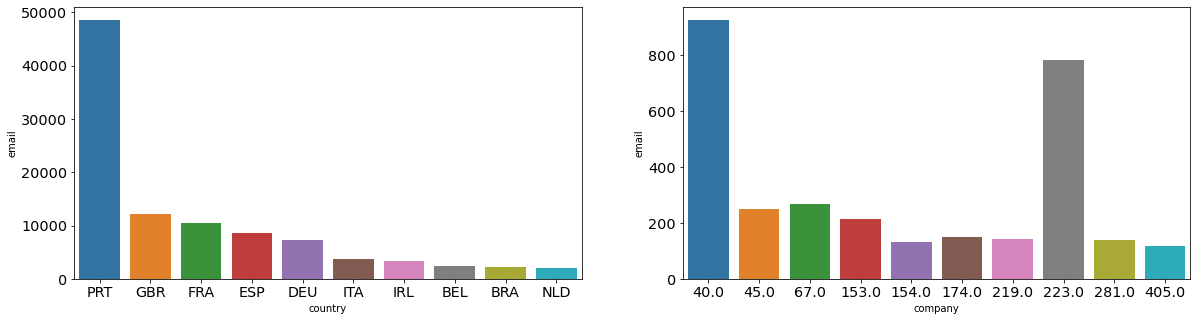

In [17]:
df_country = df.groupby(['country'])[['email']].count().reset_index().sort_values('email', ascending = False).head(10)
df_company = df.groupby(['company'])[['email']].count().reset_index().sort_values('email', ascending = False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(x = 'country', y = 'email', data = df_country, ax = axes[0])
sns.barplot(x = 'company', y = 'email', data = df_company, ax = axes[1])

## Multivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

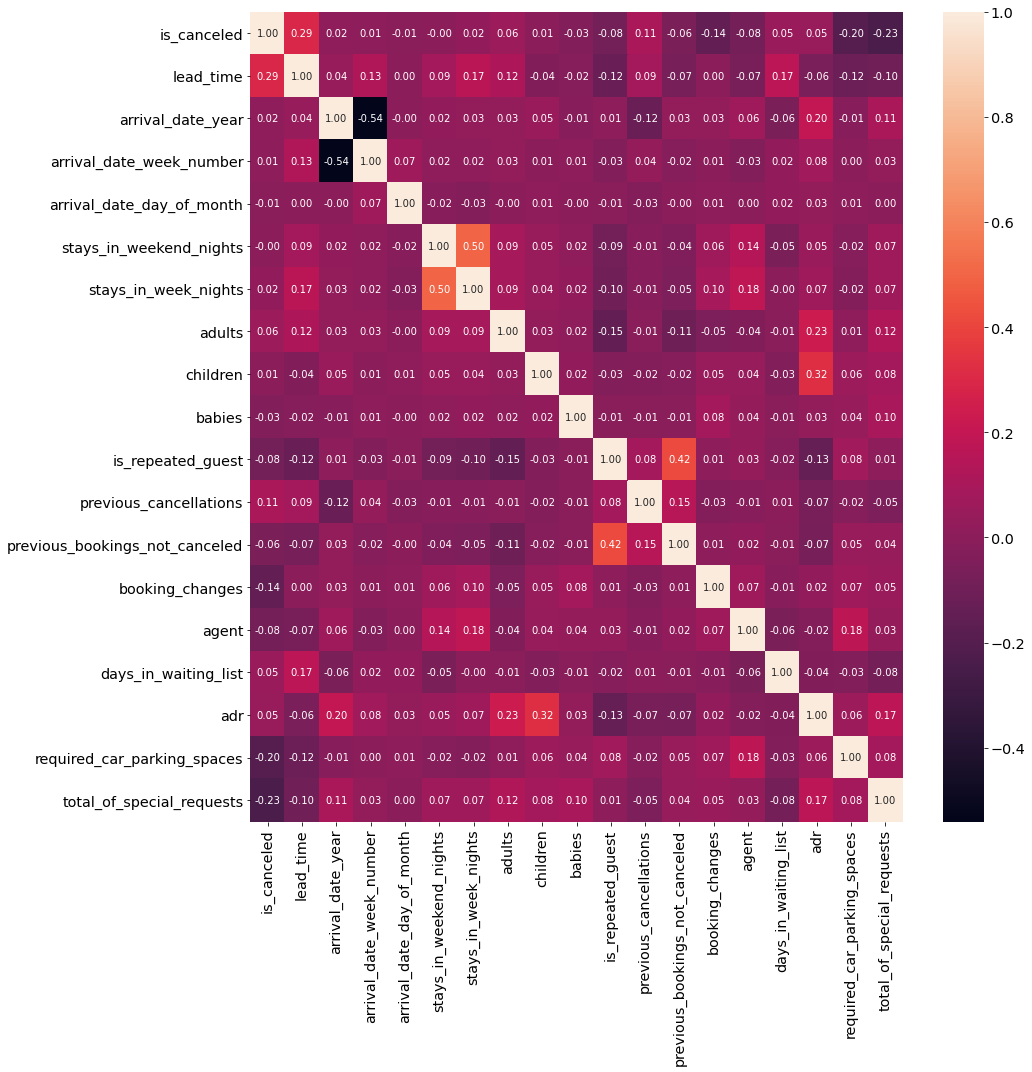

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.savefig('corr_heat_map.jpg')

### Dari visualisasi diatas :
- kolom `lead_time`, `total_of_special_request`, `required_car_parking_spaces` dan `booking_changes` cukup berkorelasi dengan variabel target kita yaitu `is_canceled`
- Kolom `stays_in_weekend_nights` dan `stays_in_week_nights` memiliki korelasi dimana ketika jumlah hari menginap customer di weekday meningkat maka jumlah hari menginap customer di weekend juga meningkat
- kolom `is_repeated_guest` dan `previous_bookings_not_canceled` memiliki korelasi (need research)
- kolom `adr` dengan `children` dan `adults` memiliki korelasi yang cukup besar dimana semakin banyak jumlah pax maka pengeluaran customer perhari juga meningkat
- kolom `adr` dengan `arrival_date_year` cukup berkorelasi dan memiliki kausalitas dimana setiap tahun harga barang meningkat sehingga pengeluaran juga akan meningkat

### Category Plot

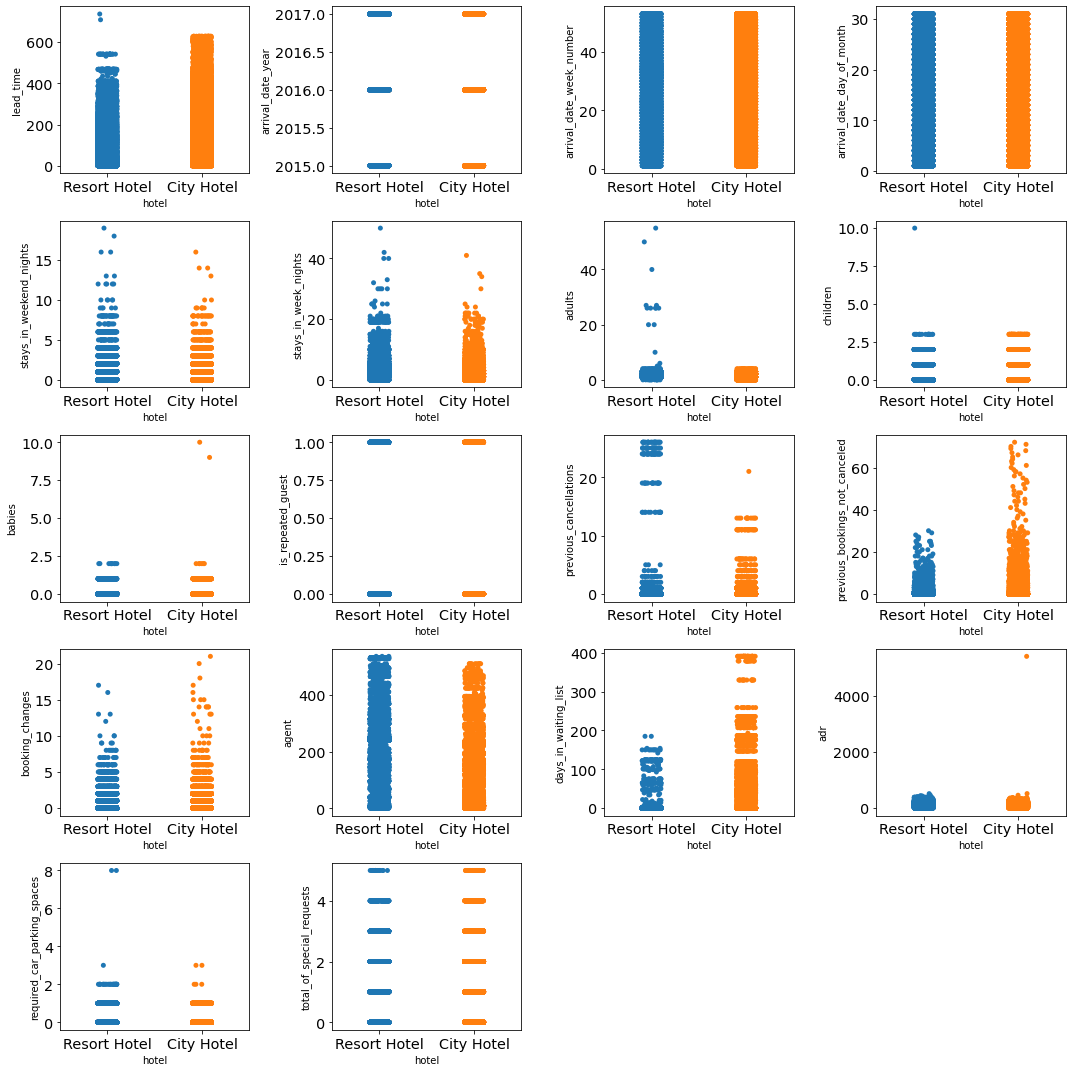

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='hotel', y=nums[i])
    plt.tight_layout()
    if i != 0: plt.close(i+1)
    plt.close(len(nums) + 1)

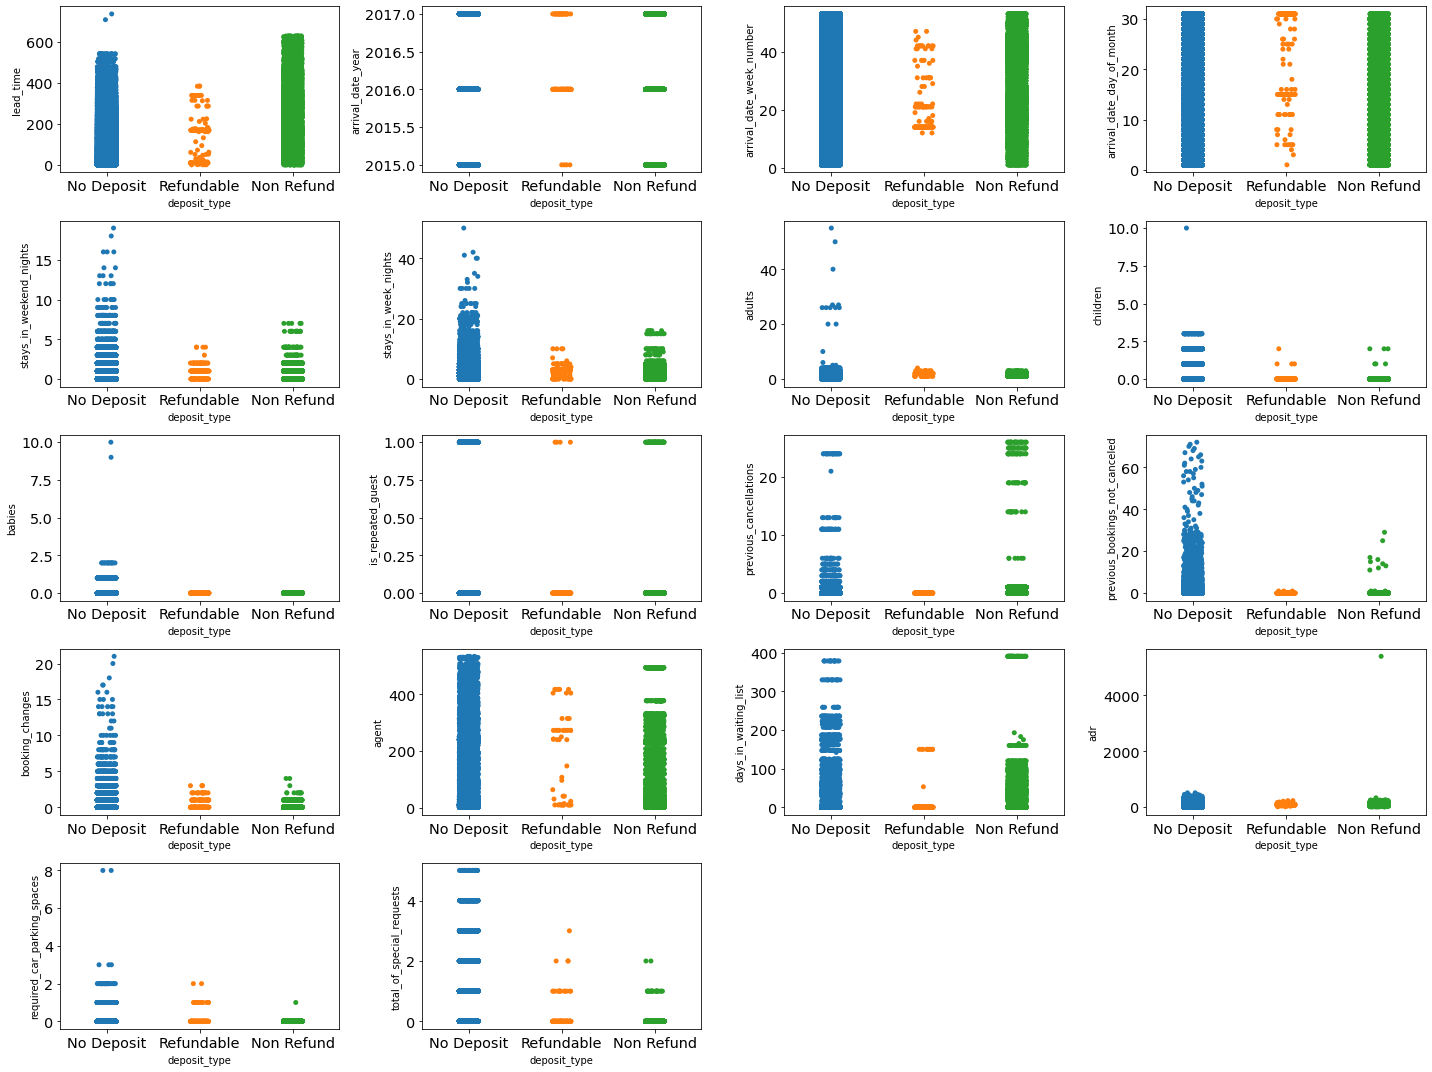

In [20]:
fig = plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='deposit_type', y=nums[i])
    plt.tight_layout()
    if i != 0: plt.close(i+1)
    plt.close(len(nums) + 1)
    plt.tight_layout()

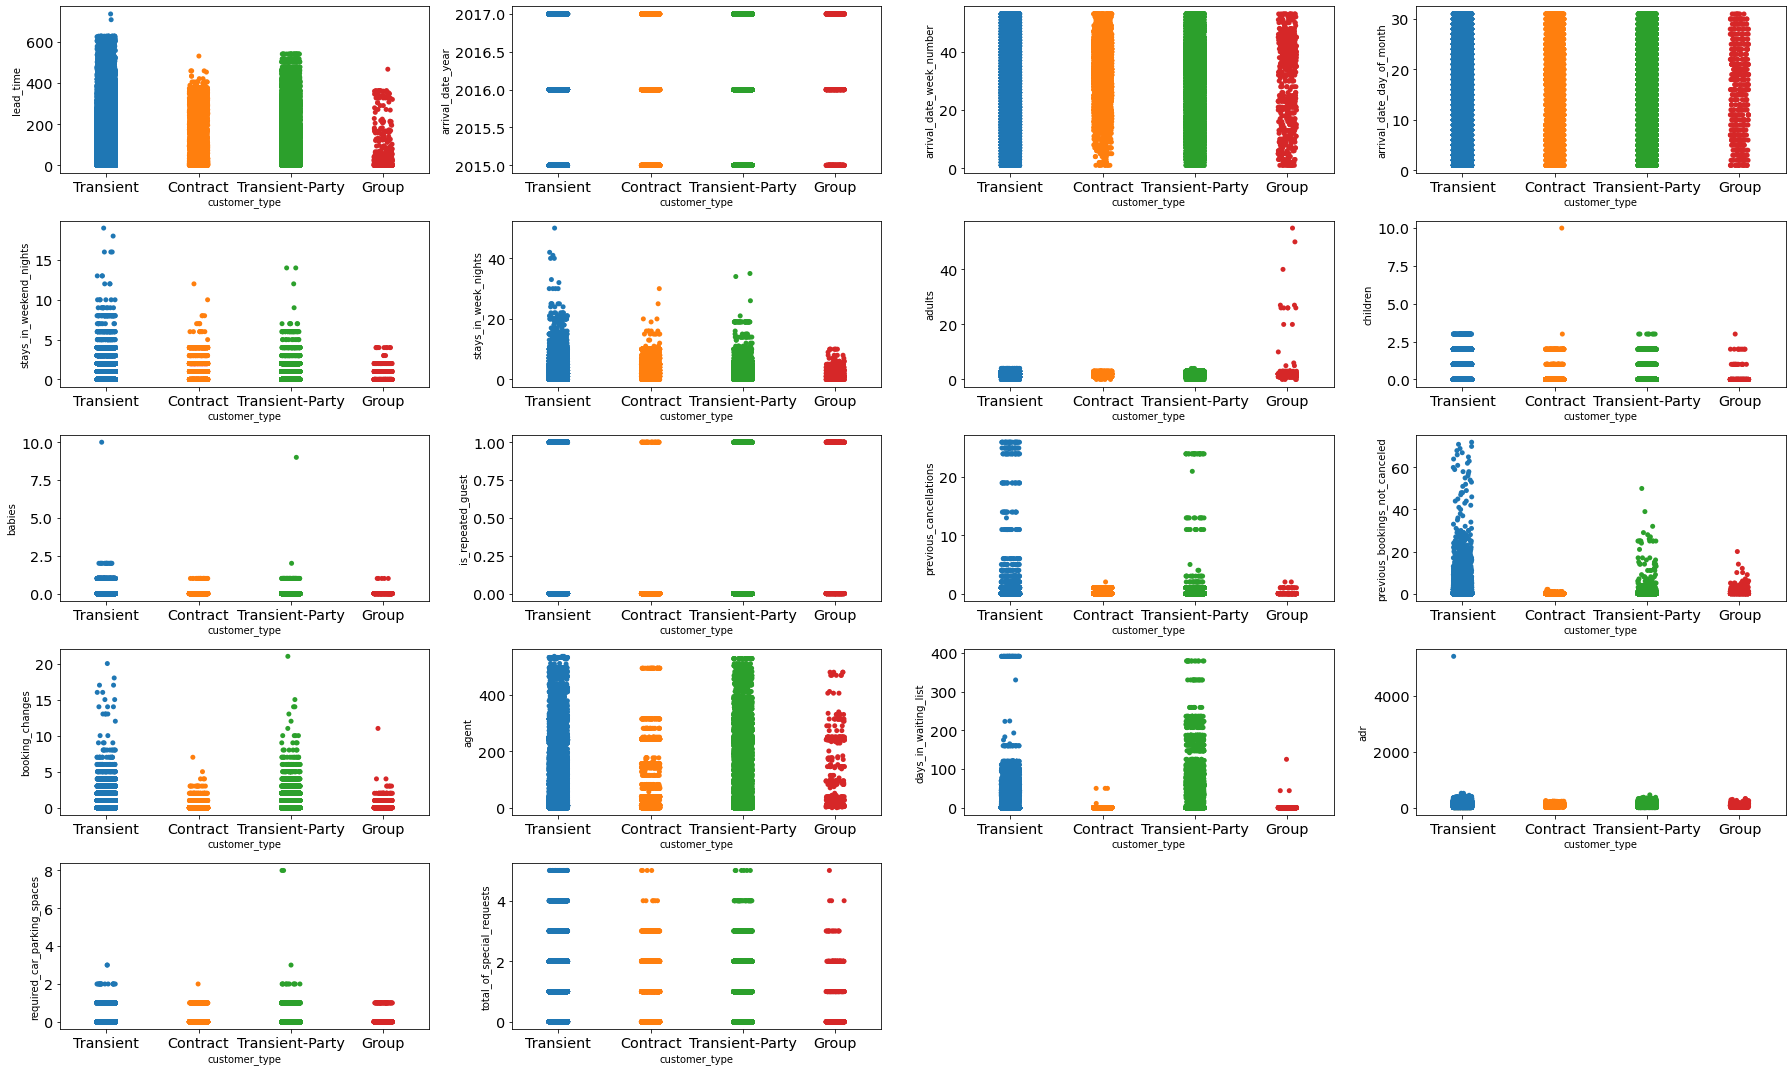

In [21]:
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 4, i+1)
    sns.stripplot(ax=ax, data=df, x='customer_type', y=nums[i])
    plt.tight_layout()
    if i != 0: plt.close(i+1)
    plt.close(len(nums) + 1)
    plt.tight_layout()

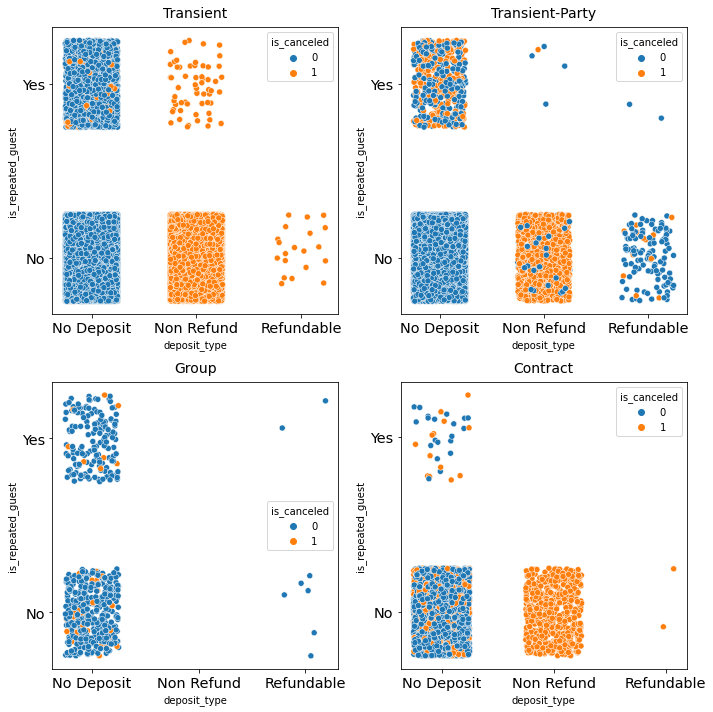

In [22]:
import warnings
warnings.filterwarnings("ignore")

list_df = ['Transient', 'Transient-Party', 'Group', 'Contract']

plt.figure(figsize = (10,10))
for index, i in enumerate(list_df):
    df_temp = df[df.customer_type == i]
    df_temp['deposit_type'] = np.where(df_temp['deposit_type'] == 'No Deposit', 0,
                                       np.where(df_temp['deposit_type'] == 'Non Refund', 1, 2))
    xnoise, ynoise = np.random.random(len(df_temp))/2, np.random.random(len(df_temp))/2
    plt.subplot(2, 2, index+1)
    plt.title(f'{i}', fontsize=14, pad=10)
    sns.scatterplot(x = df_temp['deposit_type'] + xnoise, y = df_temp['is_repeated_guest'] + ynoise, data = df_temp, hue = 'is_canceled')
    plt.yticks([0.25,1.25], labels = ['No', 'Yes'])
    plt.xticks([0.25,1.25,2.25], labels = ['No Deposit', 'Non Refund', 'Refundable'])
    plt.tight_layout() 
    plt.savefig('Customer Type')

### TimeSeries Plot

In [63]:
df_time_series = df_fe.copy()
df_time_series['arrival_date_month'] = df_time_series.apply(lambda x: dt.strptime(str(x['arrival_date_month'])+' '+str(x['arrival_date_year']), '%B %Y'), axis = 1)

Text(0, 0.5, 'Days')

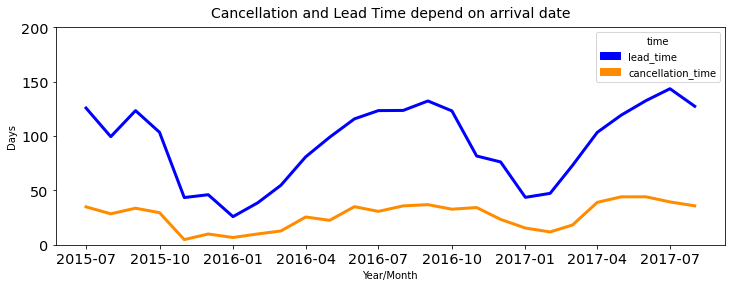

In [64]:
df_lead_time = df_time_series.groupby(['arrival_date_month'])[['lead_time']].mean().reset_index().sort_values('arrival_date_month')
df_cancellation_time = df_time_series.groupby(['arrival_date_month'])[['cancellation_time']].mean().reset_index().sort_values('arrival_date_month')

sns.lineplot(x = 'arrival_date_month', y = 'lead_time', data = df_lead_time, lw = 3, color = 'blue')
sns.lineplot(x = 'arrival_date_month', y = 'cancellation_time', data = df_cancellation_time, lw = 3, color = 'darkorange')
plt.ylim(0, 200)
colors = {'lead_time':'blue', 'cancellation_time':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='time')
plt.title('Cancellation and Lead Time depend on arrival date', fontsize = 14, pad = 10)
plt.xlabel('Year/Month')
plt.ylabel('Days')

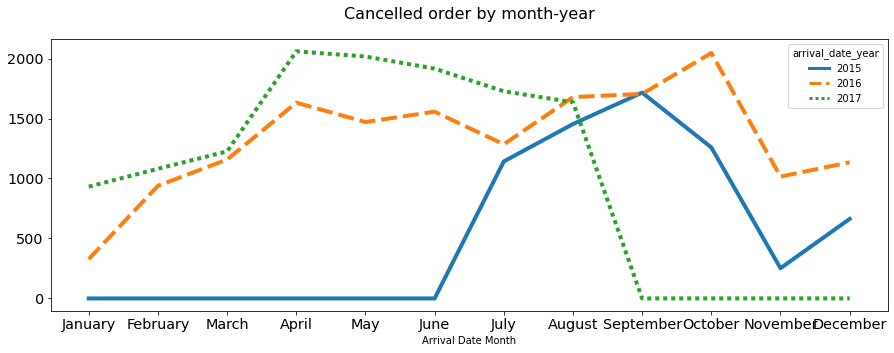

In [65]:
canceled = df[df['is_canceled'] == 1]
canceled_by_month_year = canceled.pivot_table(index='arrival_date_year', columns='arrival_date_month', aggfunc='count').fillna(0).adr.T

import calendar
canceled_by_month_year = canceled_by_month_year.reindex(calendar.month_name[1:])
plt.figure(figsize=(15, 5))
plt.xlabel('Arrival Date Month')
plt.title('Cancelled order by month-year', fontsize = 16, pad = 20)
sns.lineplot(data=canceled_by_month_year, linewidth=4)
plt.show()

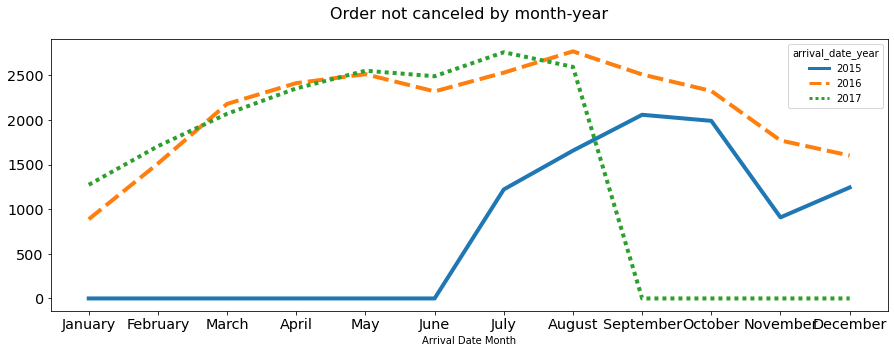

In [66]:
not_canceled = df[df['is_canceled'] == 0]
not_canceled_by_month_year = not_canceled.pivot_table(index='arrival_date_year', columns='arrival_date_month', aggfunc='count').fillna(0).adr.T

import calendar
not_canceled_by_month_year = not_canceled_by_month_year.reindex(calendar.month_name[1:])
plt.figure(figsize=(15, 5))
plt.xlabel('Arrival Date Month')
plt.title('Order not canceled by month-year', fontsize = 16, pad = 20)
sns.lineplot(data=not_canceled_by_month_year, linewidth=4)
plt.show()

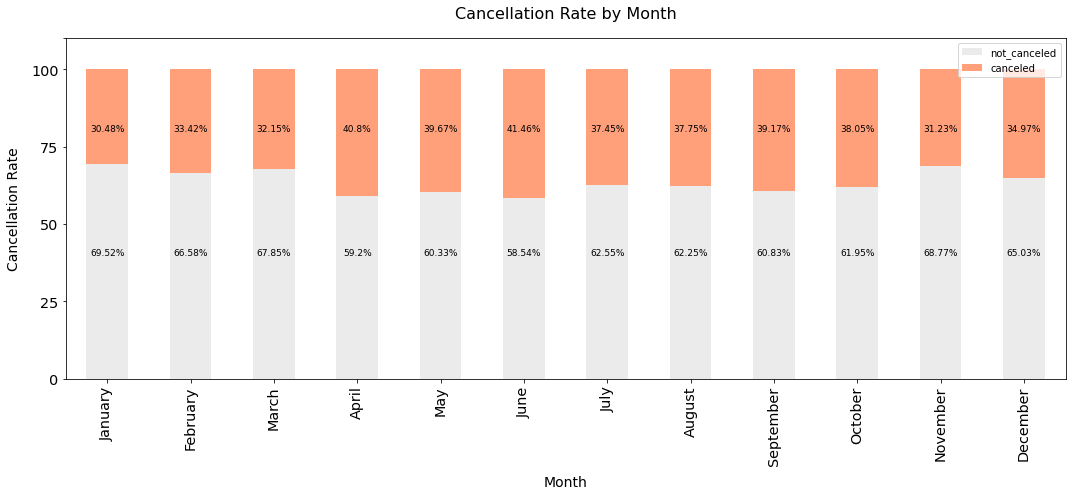

In [13]:
import calendar
order_percentage = df.pivot_table(index='is_canceled', columns='arrival_date_month', aggfunc='count').adr.apply(lambda x: round(x/(x.sum())*100, 2)).T.reindex(calendar.month_name[1:]).reset_index()
order_percentage.columns = ['month', 'not_canceled', 'canceled']
order_percentage

fig, axes = plt.subplots(1,1)
order_percentage.plot(x = 'month', kind = 'bar', stacked = True, figsize=(15,7), color=['#ebebeb','lightsalmon'], ax = axes)
axes.set_title('Cancellation Rate by Month', fontsize = 16, pad = 20)
axes.set_ylabel('Cancellation Rate', fontsize = 14, labelpad = 10)
axes.set_xlabel('Month', fontsize = 14, labelpad = 10)
axes.set_yticks([0, 25, 50, 75, 100, 110])
axes.set_yticklabels(['0', '25', '50', '75', '100', ' '])

#add data point not_canceled
x = order_percentage['month']
y = order_percentage['not_canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 40, s = str(y[i])+'%', size = 9, ha='center')
    
# #add data point canceled
x = order_percentage['month']
y = order_percentage['canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 80, s = str(y[i])+'%', size = 9, ha='center')
plt.tight_layout()
plt.savefig('Cancellation_rate_month.jpg')

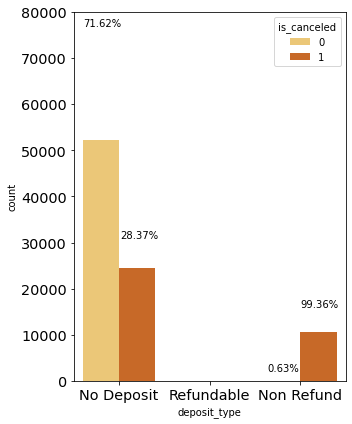

In [68]:
plt.figure(figsize = (5, 6))
sns.countplot(x = 'deposit_type', hue = 'is_canceled', data = df, palette = 'YlOrBr')
plt.ylim((0, 80000))

plt.text(-0.4, 77000, s = '71.62%')
plt.text(0.01, 31000, s = '28.37%')

plt.text(1.64, 2000, s = '0.63%')
plt.text(2, 16000, s = '99.36%')

plt.tight_layout()
plt.savefig('deposit_type.jpg')

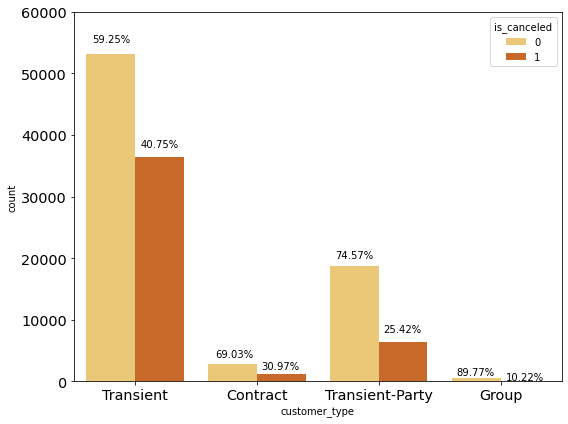

In [14]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'customer_type', hue = 'is_canceled', data = df, palette = 'YlOrBr')

plt.ylim(0, 60000)
plt.text(-0.35, 55000, s = '59.25%')
plt.text(0.05, 38000, s = '40.75%')

plt.text(0.66, 4000, s = '69.03%')
plt.text(1.04, 2000, s = '30.97%')

plt.text(1.64, 20000, s = '74.57%')
plt.text(2.04, 8000, s = '25.42%')

plt.text(2.64, 1000, s = '89.77%')
plt.text(3.04, 200, s = '10.22%')

plt.tight_layout()


plt.savefig('customer_type.jpg')

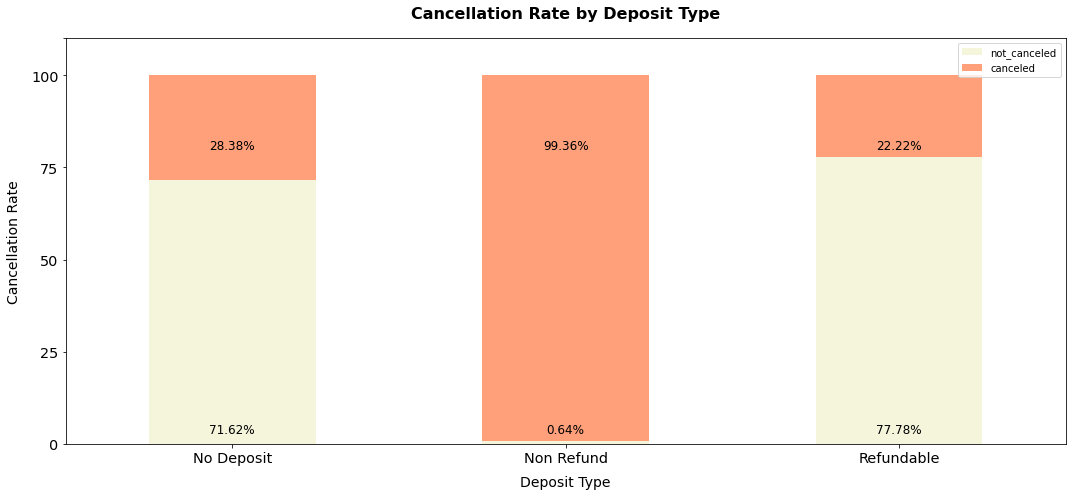

In [15]:
deposit_cancel_rate = df.pivot_table(index='is_canceled', columns='deposit_type', aggfunc='count').adr.apply(lambda x: round(x/(x.sum())*100, 2)).T.fillna(0).reset_index()
deposit_cancel_rate.columns = ['deposit_type', 'not_canceled', 'canceled']
deposit_cancel_rate

fig, axes = plt.subplots(1,1)
deposit_cancel_rate.plot(x = 'deposit_type', kind = 'bar', stacked = True, figsize=(15,7), color=['beige','lightsalmon'], ax = axes)
axes.set_title('Cancellation Rate by Deposit Type', fontsize = 16, pad = 20,weight='bold')
axes.set_ylabel('Cancellation Rate', fontsize = 14, labelpad = 10)
axes.set_xlabel('Deposit Type', fontsize = 14, labelpad = 10)
axes.set_yticks([0, 25, 50, 75, 100, 110])
axes.set_yticklabels(['0', '25', '50', '75', '100', ' '])
plt.xticks(rotation = 0)

#add data point not_canceled
x = deposit_cancel_rate['deposit_type']
y = deposit_cancel_rate['not_canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 3, s = str(y[i])+'%', size = 12, ha='center')
    
# #add data point canceled
x = deposit_cancel_rate['deposit_type']
y = deposit_cancel_rate['canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 80, s = str(y[i])+'%', size = 12, ha='center')

plt.tight_layout()
plt.savefig('deposit_type_2.jpg')

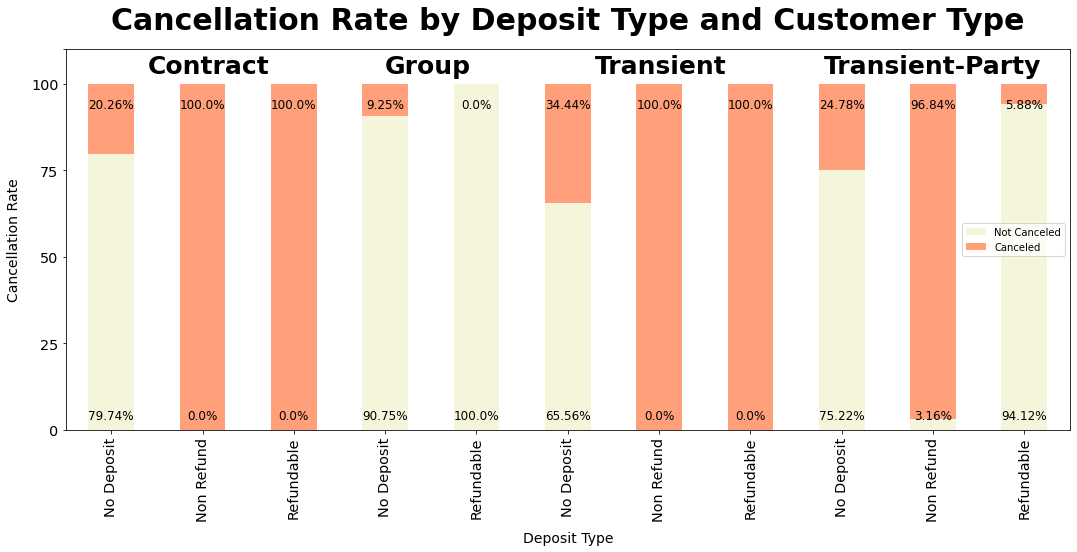

In [71]:
dep_custype_cancel_rate = df.pivot_table(index='is_canceled', columns=['customer_type','deposit_type'], aggfunc='count').adr.apply(lambda x: round(x/(x.sum())*100, 2)).T.fillna(0).reset_index()
dep_custype_cancel_rate.columns = ['customer_type','deposit_type', 'not_canceled', 'canceled']
dep_custype_cancel_rate

fig, axes = plt.subplots(1,1)
dep_custype_cancel_rate.plot(x = 'deposit_type', kind = 'bar', stacked = True, figsize=(18,7), color=['beige','lightsalmon'], ax = axes)
axes.set_title('Cancellation Rate by Deposit Type and Customer Type', fontsize = 30, pad = 20,weight='bold')
axes.set_ylabel('Cancellation Rate', fontsize = 14, labelpad = 10)
axes.set_xlabel('Deposit Type', fontsize = 14, labelpad = 10)
axes.set_yticks([0, 25, 50, 75, 100, 110])
axes.set_yticklabels(['0', '25', '50', '75', '100', ' '])
axes.text(x = 0.4, y = 103, s = 'Contract', size = 25, weight = 'bold')
axes.text(x = 3, y = 103, s = 'Group', size = 25, weight = 'bold')
axes.text(x = 5.3, y = 103, s = 'Transient', size = 25, weight = 'bold')
axes.text(x = 7.8, y = 103, s = 'Transient-Party', size = 25, weight = 'bold')
axes.legend(['Not Canceled','Canceled'],loc='center right')

#add data point not_canceled
x = dep_custype_cancel_rate['deposit_type']
y = dep_custype_cancel_rate['not_canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 3, s = str(y[i])+'%', size = 12, ha='center')
    
# #add data point canceled
x = dep_custype_cancel_rate['deposit_type']
y = dep_custype_cancel_rate['canceled']
x_numbers = range(len(x))
for i in x_numbers:
    axes.text(x = x_numbers[i], y = 93, s = str(y[i])+'%', size = 12, ha='center')